In [1]:
import sys
import os
import glob
import numpy as np
import pandas as pd
import h5py
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import re

In [2]:
sys.path.append(os.getcwd() + "/../../cds-backend/code/")
import cds_eua4 as eua

matplotlib.rcParams.update({"font.size": 20})
matplotlib.rcParams["figure.figsize"] = (20, 10)

no config found


In [3]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]


## Resort report_id for Meisei data

In [4]:
def find_gap(df, group_name, delta):
    singleseries = df
    singleseries['gap'] = singleseries[group_name].sort_values().diff() > delta
    return singleseries[singleseries.gap]

In [5]:
# with eua.CDMDataset(glob.glob("/scratch/das/federico/INTERCOMPARISON_MAURITIUS/0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc")[0]) as file:
#     display(file)
#     df_meis = file.to_dataframe(groups=['observations_table'], variables=['observation_value', 'observed_variable', 'date_time', 'z_coordinate', 'report_id'])
    
# df_meis = df_meis.sort_values(by='date_time')
# gaps = find_gap(df = df_meis, group_name = 'date_time', delta = pd.to_timedelta('1 hour'))

# rep_id = []
# rid = 1
# for i in gaps.date_time:
#     byte_rid = [x.encode() for x in str(rid).zfill(10)]
#     rep_id.extend([byte_rid] * (len(df_meis[df_meis.date_time < i])-len(rep_id)))
#     rid += 1
# byte_rid = [x.encode() for x in str(rid).zfill(10)]
# rep_id.extend([str(byte_rid).zfill(10)] * (len(df_meis)-len(rep_id)))

# sys.path.append("../../trajectory/")
# from harvest_convert_to_netCDF import write_dict_h5

# mode='w'
# targetfile = '/users/staff/uvoggenberger/scratch/mauritius/0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc'
# group = 'observations_table'

# i = 'report_id'

# with h5py.File(targetfile,  "a") as f:
#     del f[group][i]

# ov_vars = np.array(rep_id)
# alldict = pd.DataFrame({i:ov_vars})
# write_dict_h5(targetfile, alldict, group, {i: { 'compression': 'gzip' } }, [i]) 

# log = ! h5repack -v GZIP=5 {targetfile} {repackfile}


## CUON Data

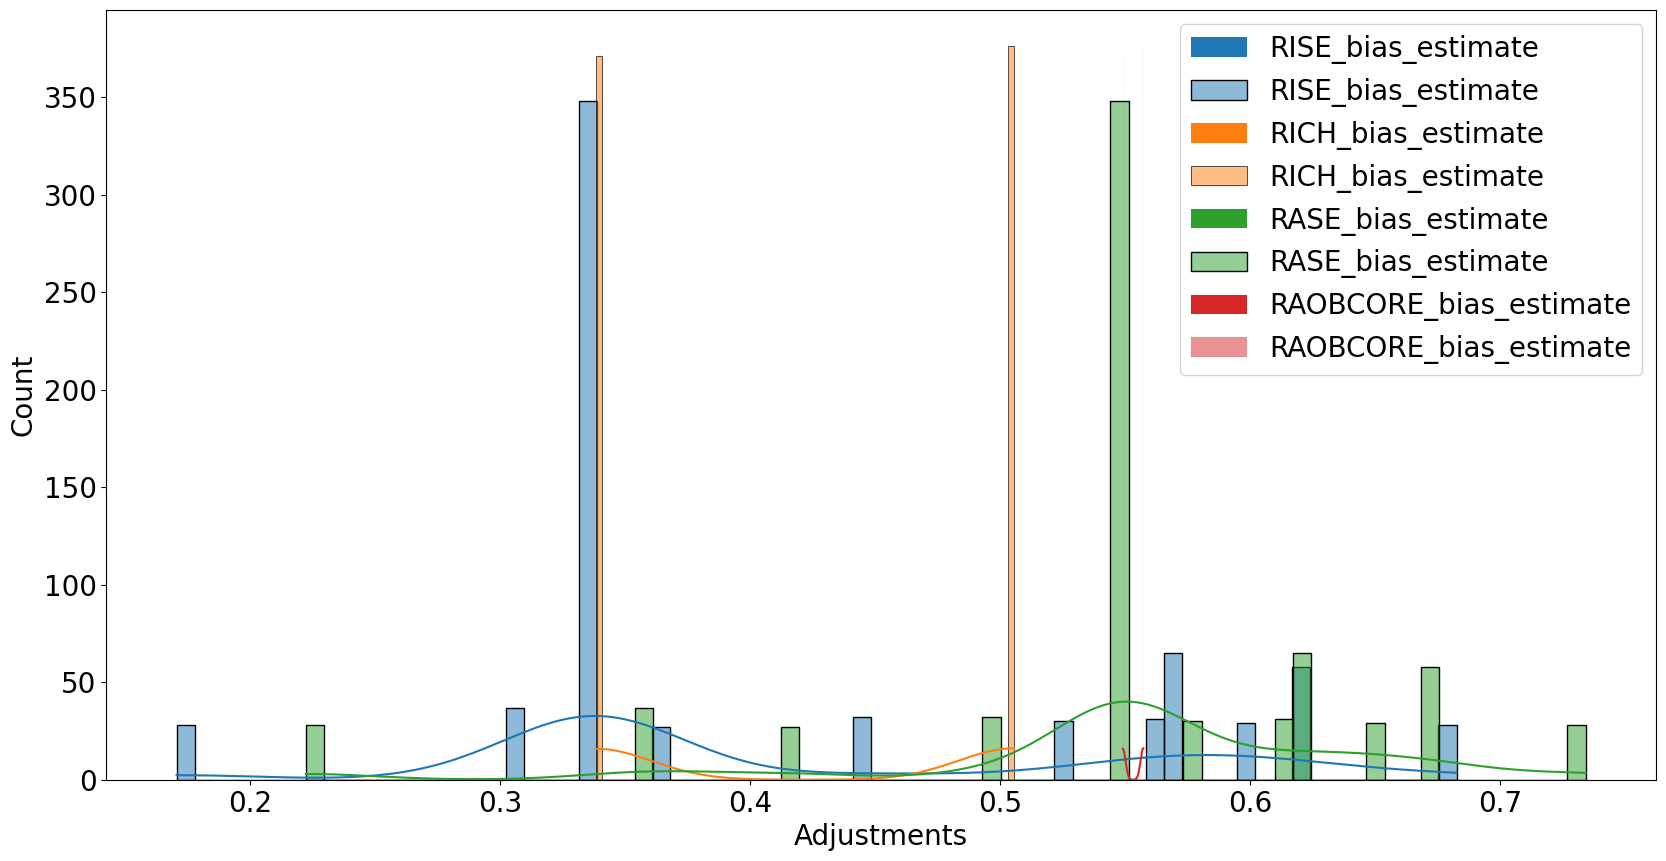

In [14]:
rq = {
    "statid": "11035",
    
    "date": ["20050101-20051231"],
    "variable": ["air_temperature"],# "wind_speed", "geopotential"],
    "format": "nc",
    "optional": ['obs_minus_an','obs_minus_bg', 'bias_estimate_method', 'RISE_bias_estimate', 'RICH_bias_estimate', 'RASE_bias_estimate', 'RAOBCORE_bias_estimate',],
    # "dummy": str(np.random.rand()),
}
df = eua.vm_request_wrapper(rq, overwrite=True)# , vm_url="http://127.0.0.1:8007")
df = df.to_dataframe()

df = df[df.plev == 5000]

hist_data = []
for i in ['RISE_bias_estimate', 'RICH_bias_estimate', 'RASE_bias_estimate', 'RAOBCORE_bias_estimate',]:# 'obs_minus_an','obs_minus_bg']:
    hist_data.append(df[i].dropna())
    ax = seaborn.histplot(hist_data[-1], label = i, kde=True, bins=70)
ax.set(xlabel='Adjustments')
plt.legend() 
plt.show()

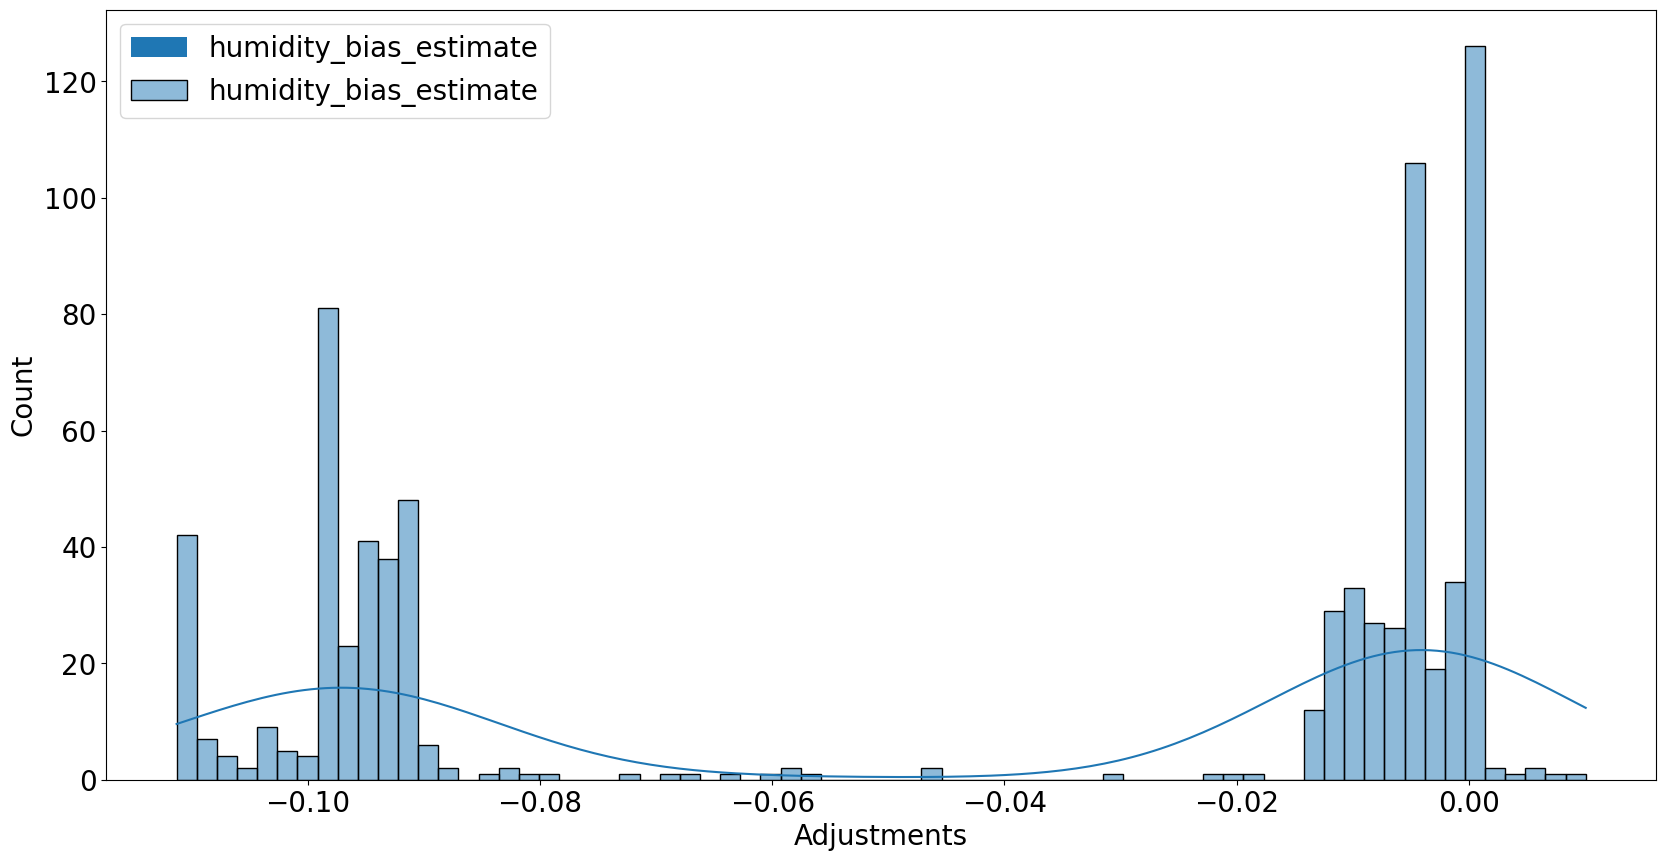

In [15]:
rq = {
    "statid": "11035",
    
    "date": ["20050101-20051231"],
    "variable": ["relative_humidity"],# "wind_speed", "geopotential"],
    "format": "nc",
    "optional": ['humidity_bias_estimate'],
    # "dummy": str(np.random.rand()),
}
df = eua.vm_request_wrapper(rq, overwrite=True)# , vm_url="http://127.0.0.1:8007")
df = df.to_dataframe()

df = df[df.plev == 30000]

hist_data = []
for i in ['humidity_bias_estimate']:# 'obs_minus_an','obs_minus_bg']:
    hist_data.append(df[i].dropna())
    ax = seaborn.histplot(hist_data[-1], label = i, kde=True, bins=70)
ax.set(xlabel='Adjustments')
plt.legend() 
plt.show()

## Mauritius Data

In [16]:
with eua.CDMDataset(glob.glob("/users/staff/uvoggenberger/scratch/mauritius/*vais*.nc")[0]) as file:
    display(file)
    df_vais = file.to_dataframe(groups=['observations_table'], variables=['observation_value', 'observed_variable', 'date_time', 'z_coordinate', 'report_id'])
    df_vais = df_vais[df_vais.observed_variable == 126]
with eua.CDMDataset(glob.glob("/users/staff/uvoggenberger/scratch/mauritius/*meis*.nc")[0]) as file:
    display(file)
    df_meis = file.to_dataframe(groups=['observations_table'], variables=['observation_value', 'observed_variable', 'date_time', 'z_coordinate', 'report_id'])
    df_meis = df_meis[df_meis.observed_variable == 126]


File: <HDF5 file "0-20000-0-61995_mauritius_harvested_vaisala_ascents.csv.nc" (mode r)>
Filesize: 5.95 MB
Filename: /users/staff/uvoggenberger/scratch/mauritius/0-20000-0-61995_mauritius_harvested_vaisala_ascents.csv.nc
(G)roups/(V)ariables: 

 - G | crs__________________________________________ : : 4
 - V | dateindex____________________________________ : : (9,)
 - G | header_table_________________________________ : : 54
 - G | observations_table___________________________ : : 52
 - G | observed_variable____________________________ : : 9
 - V | recordindex__________________________________ : : (56,)
 - V | recordtimestamp______________________________ : : (56,)
 - G | sensor_configuration_________________________ : : 0
 - G | source_configuration_________________________ : : 32
 - G | station_configuration________________________ : : 44
 - G | station_configuration_codes__________________ : : 7
 - G | station_type_________________________________ : : 4
 - G | units_____________________

File: <HDF5 file "0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc" (mode r)>
Filesize: 11.04 MB
Filename: /users/staff/uvoggenberger/scratch/mauritius/0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc
(G)roups/(V)ariables: 

 - G | crs__________________________________________ : : 4
 - V | dateindex____________________________________ : : (9,)
 - G | header_table_________________________________ : : 54
 - G | observations_table___________________________ : : 52
 - G | observed_variable____________________________ : : 9
 - V | recordindex__________________________________ : : (250268,)
 - V | recordtimestamp______________________________ : : (250268,)
 - G | sensor_configuration_________________________ : : 0
 - G | source_configuration_________________________ : : 32
 - G | station_configuration________________________ : : 44
 - G | station_configuration_codes__________________ : : 7
 - G | station_type_________________________________ : : 4
 - G | units______________

In [17]:
df_meis

,observation_value,observed_variable,date_time,z_coordinate,report_id
0,227.449997,126,2005-02-07 00:00:00,22580.0,0
4,227.350006,126,2005-02-07 00:00:01,22560.0,0
8,227.350006,126,2005-02-07 00:00:02,22530.0,0
12,227.250000,126,2005-02-07 00:00:03,22510.0,0
16,227.149994,126,2005-02-07 00:00:04,22490.0,0
...,...,...,...,...,...
1007700,NaN,126,2005-02-25 21:02:12,3270.0,0
1007704,NaN,126,2005-02-25 21:02:13,3270.0,0
1007708,NaN,126,2005-02-25 21:02:14,3270.0,0
1007712,NaN,126,2005-02-25 21:02:15,3270.0,0


/tmp/ipykernel_684497/4203420488.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ov_vars = np.array(rep_id)


In [15]:
ov_vars

array(['0000000001', '0000000001', '0000000001', ..., '0000000042',
       '0000000042', '0000000042'], dtype='<U10')

In [63]:
df_meis[df_meis.date_time.dt.day == 7]

,observation_value,observed_variable,date_time,z_coordinate,report_id
0,227.449997,126,2005-02-07 00:00:00,22580.0,0000008616
4,227.350006,126,2005-02-07 00:00:01,22560.0,0000008617
8,227.350006,126,2005-02-07 00:00:02,22530.0,0000008618
12,227.250000,126,2005-02-07 00:00:03,22510.0,0000008619
16,227.149994,126,2005-02-07 00:00:04,22490.0,0000008620
...,...,...,...,...,...
46812,227.750000,126,2005-02-07 23:59:55,22700.0,0000008611
46816,227.649994,126,2005-02-07 23:59:56,22670.0,0000008612
46820,227.649994,126,2005-02-07 23:59:57,22650.0,0000008613
46824,227.550003,126,2005-02-07 23:59:58,22630.0,0000008614


In [64]:
base_df = df_vais[np.logical_and(df_vais.date_time <= '2005-02-07 14:57:50' ,df_vais.date_time >= '2005-02-07 10:01:53')]
sel_df = df_meis[np.logical_and(df_meis.date_time <= '2005-02-07 14:57:50' ,df_meis.date_time >= '2005-02-07 10:01:53')]

In [65]:
delta_t = []
for press in range(len(base_df)):
    delta_t.append(
        base_df.observation_value.iloc[press]
        - sel_df[sel_df.z_coordinate
            == find_nearest(
                np.array(sel_df.z_coordinate),
                base_df.z_coordinate.iloc[press]
            )
        ].observation_value.values[0]
    )
    ax = seaborn.histplot(delta_t, label=labels[sonde], kde=True)
ax.set(xlabel="Adjustments")
ax.set(title='temperature difference to Vaisala sonde')
plt.legend()
plt.show()


KeyboardInterrupt

KeyboardInterrupt



Error in callback <function flush_figures at 0x7fc4d5a19ab0> (for post_execute):



KeyboardInterrupt



./Changf.001
./Graw.001
./Vaisala.001
./Meisei.001
./Huayun.001


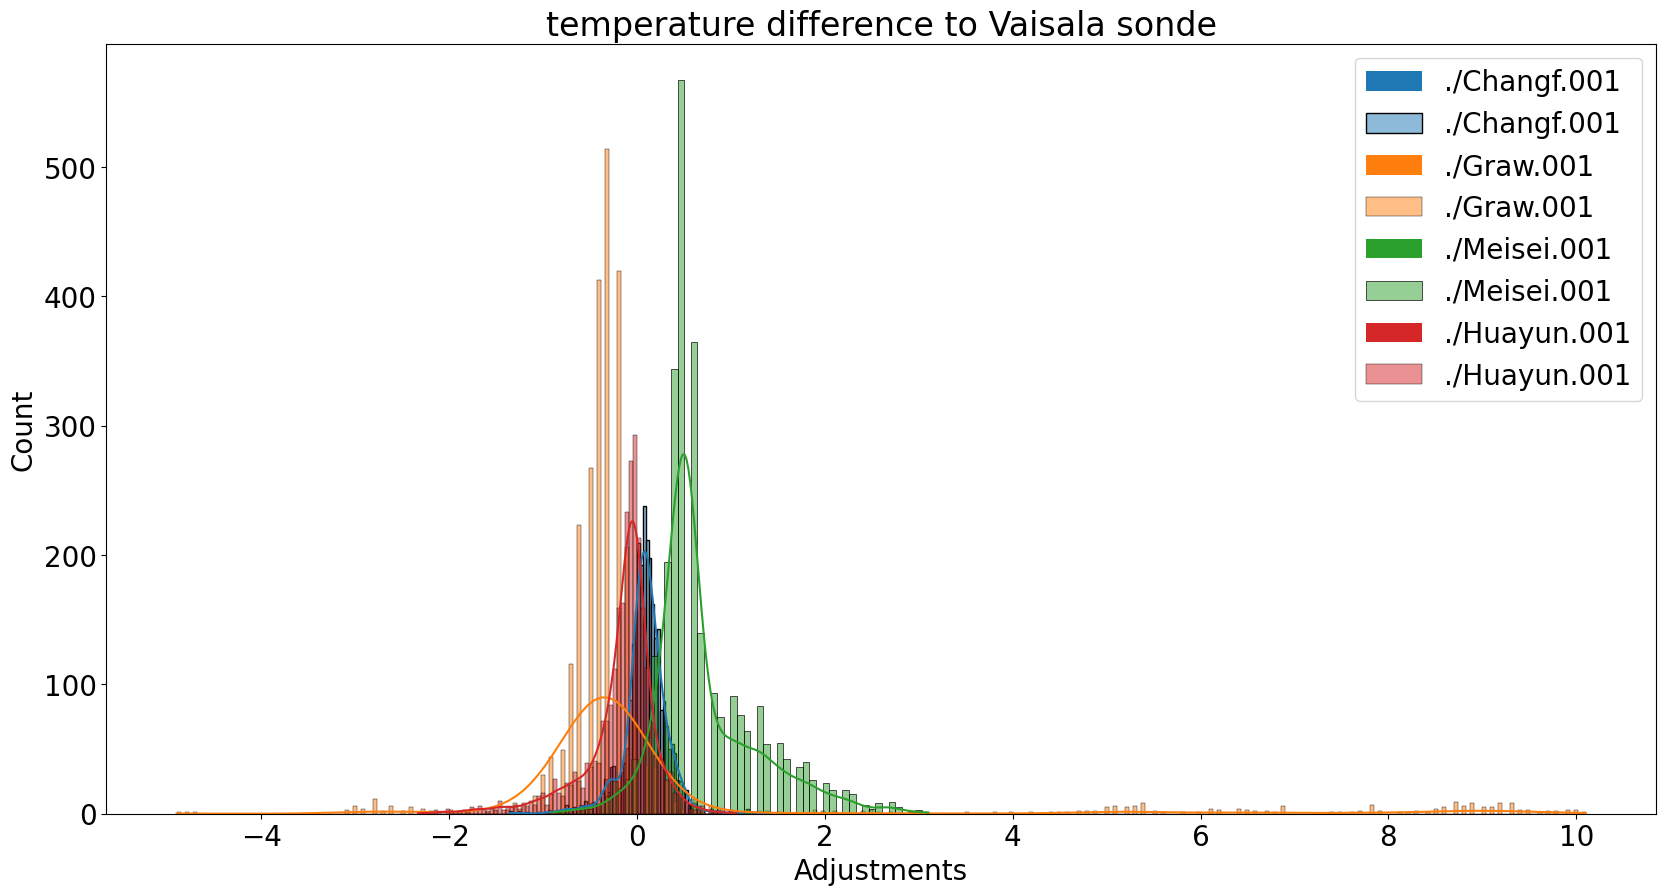

./Changf.004
./Graw.004
./Vaisala.004
./Meisei.004
./Huayun.004


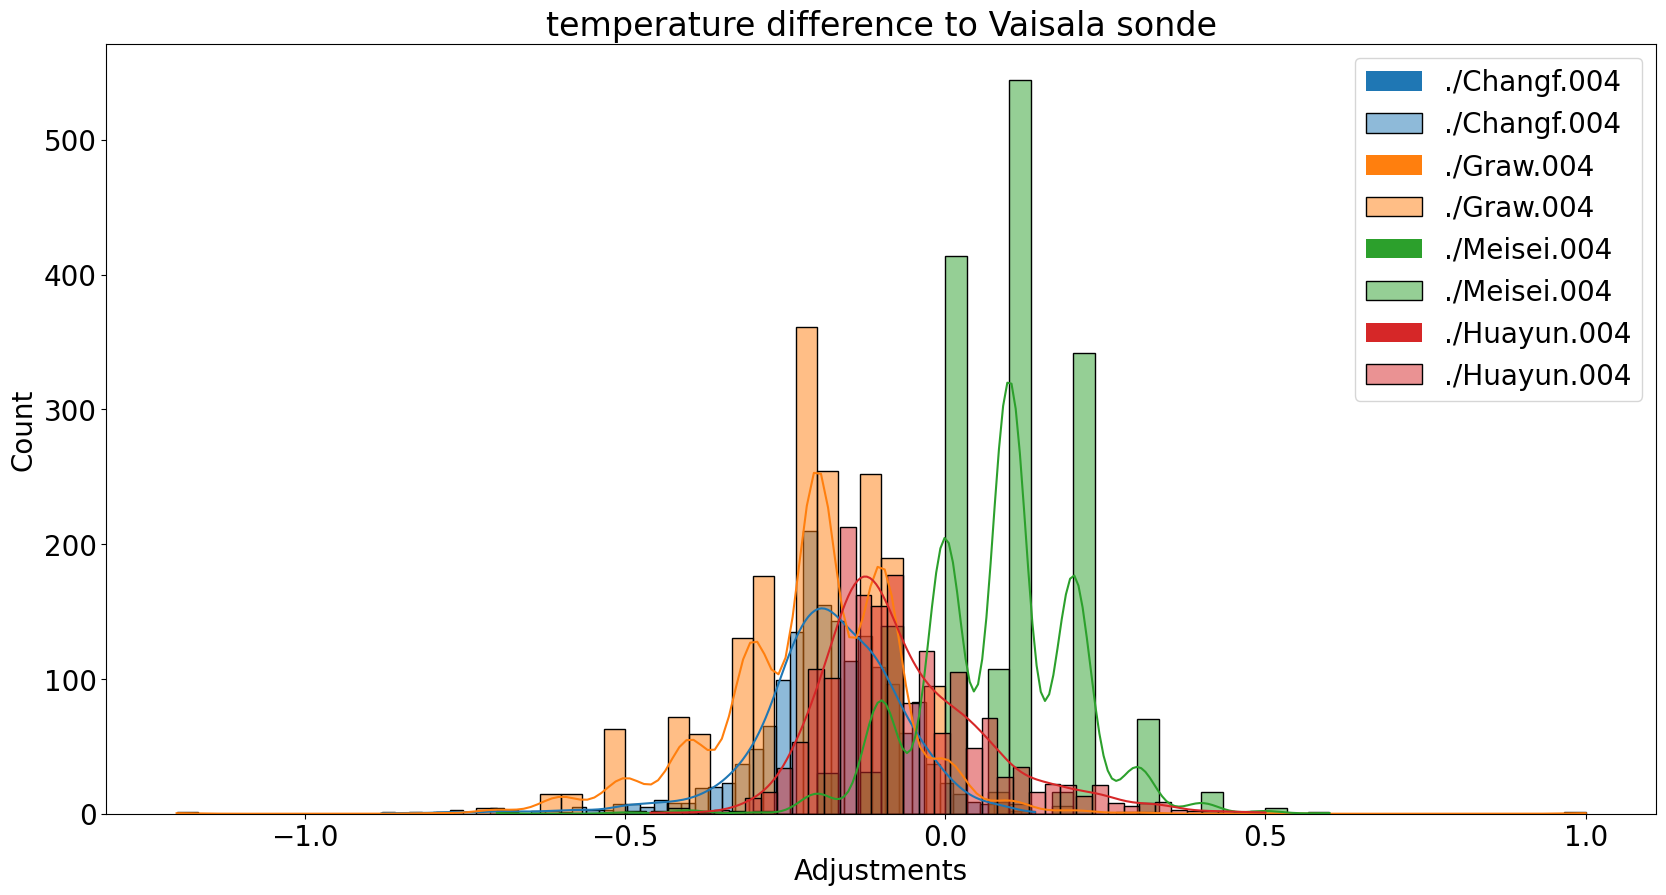

./Changf.006
./Graw.006
./Vaisala.006
./Meisei.006
./Huayun.006


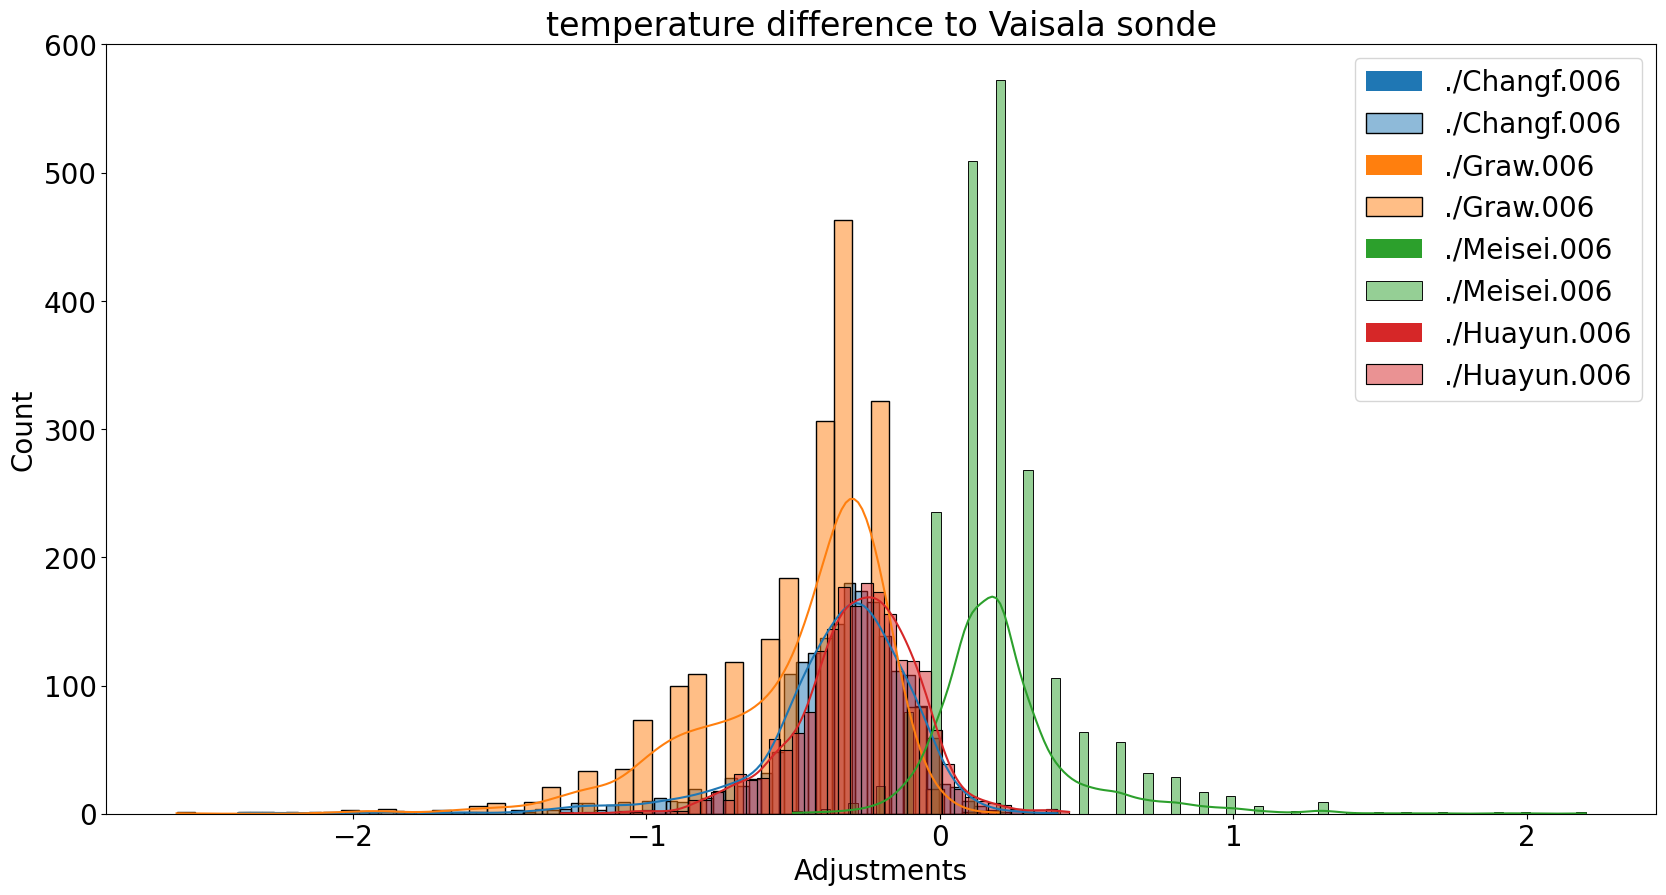

./Changf.008
./Graw.008
./Vaisala.008
./Meisei.008
./Huayun.008


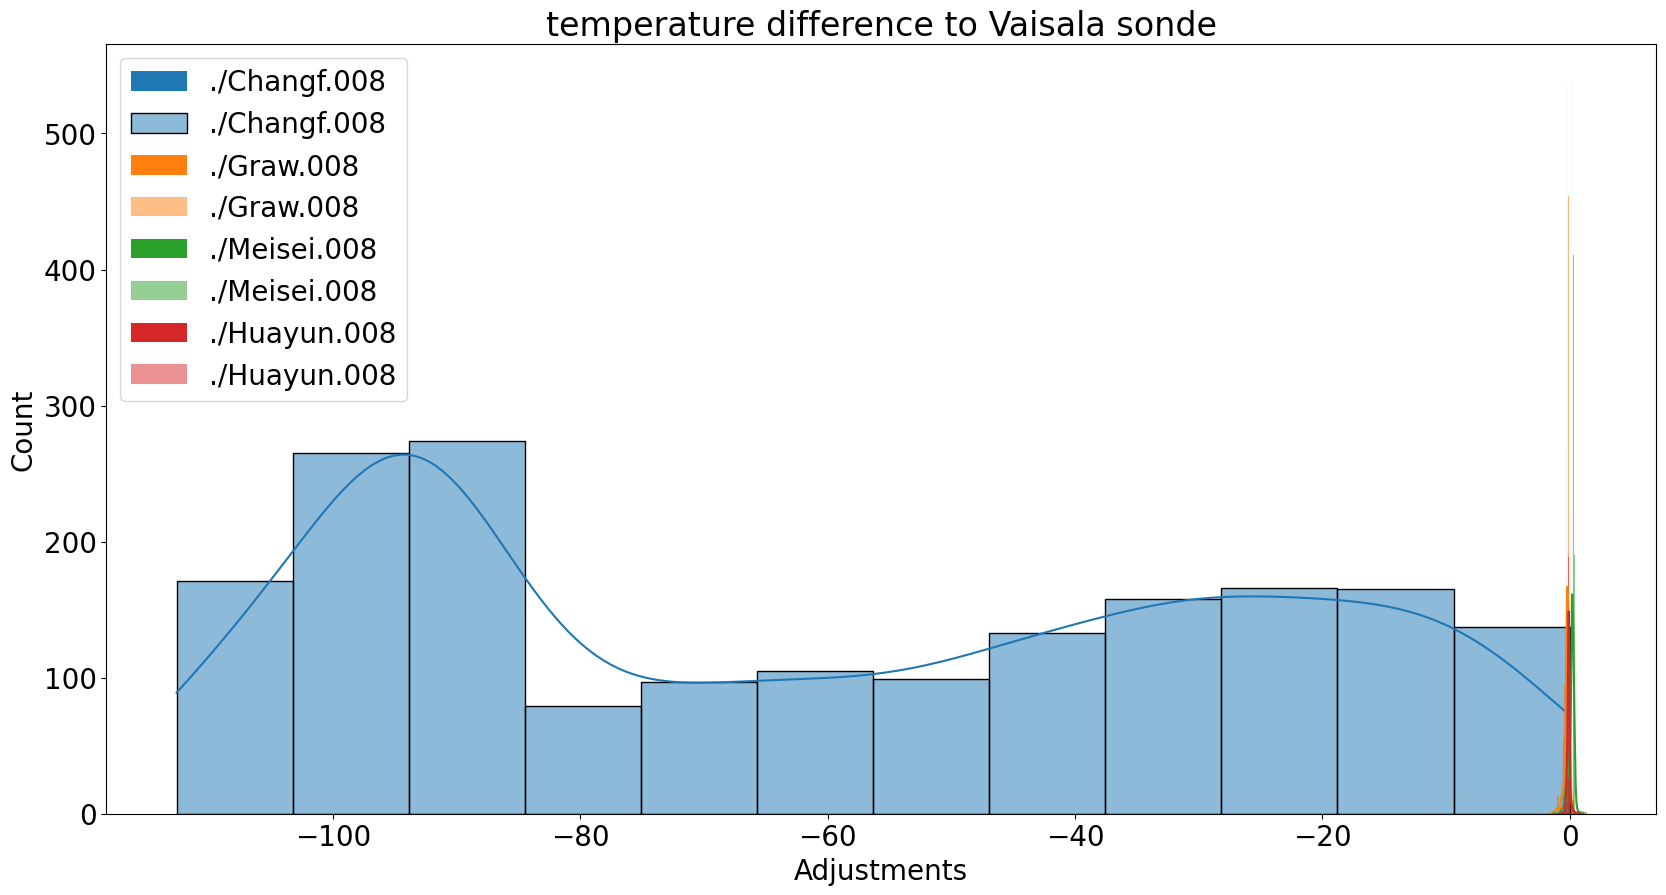

error
./Changf.013
./Graw.013
./Vaisala.013
./Meisei.013
./Huayun.013


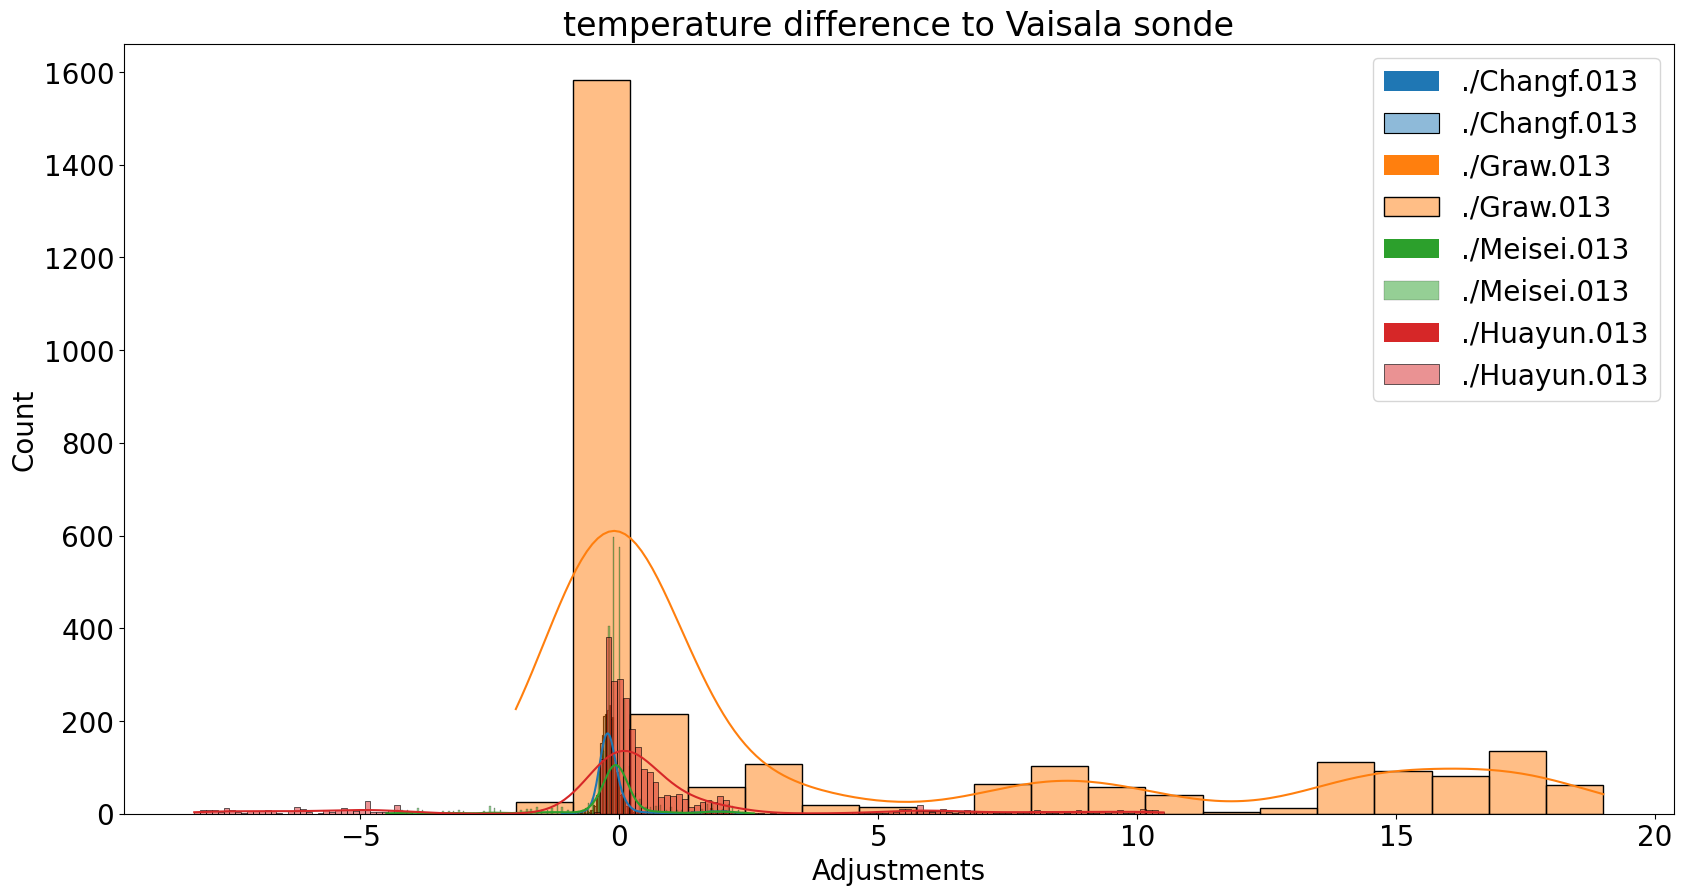

./Changf.016
./Graw.016
./Vaisala.016
./Meisei.016
./Huayun.016


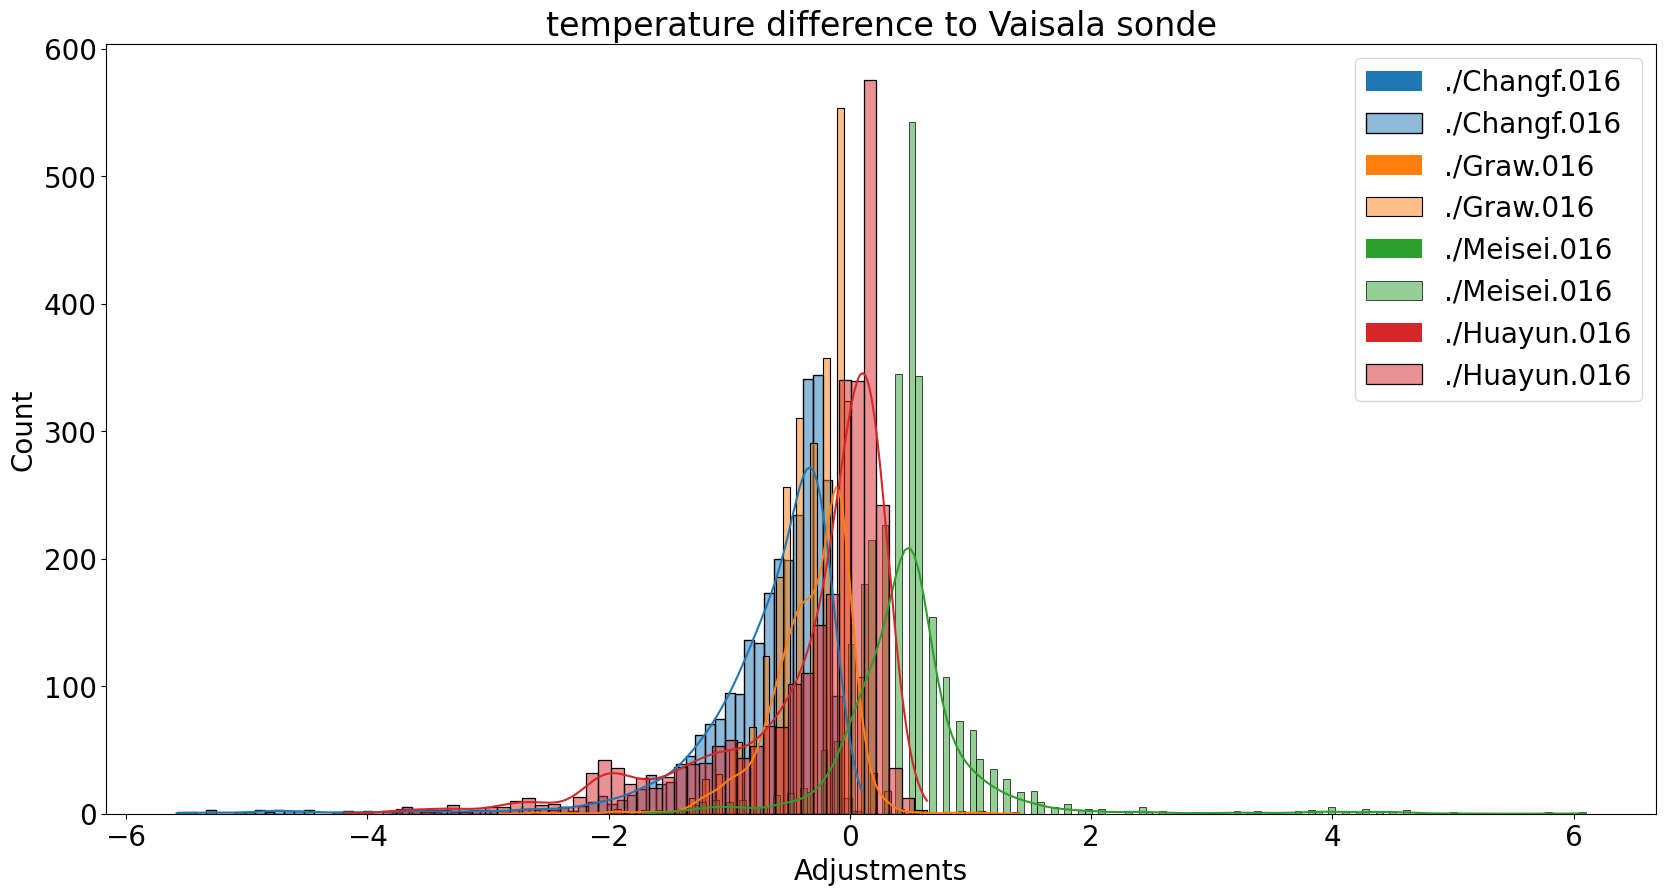

./Changf.018
./Graw.018
./Vaisala.018
./Meisei.018
./Huayun.018


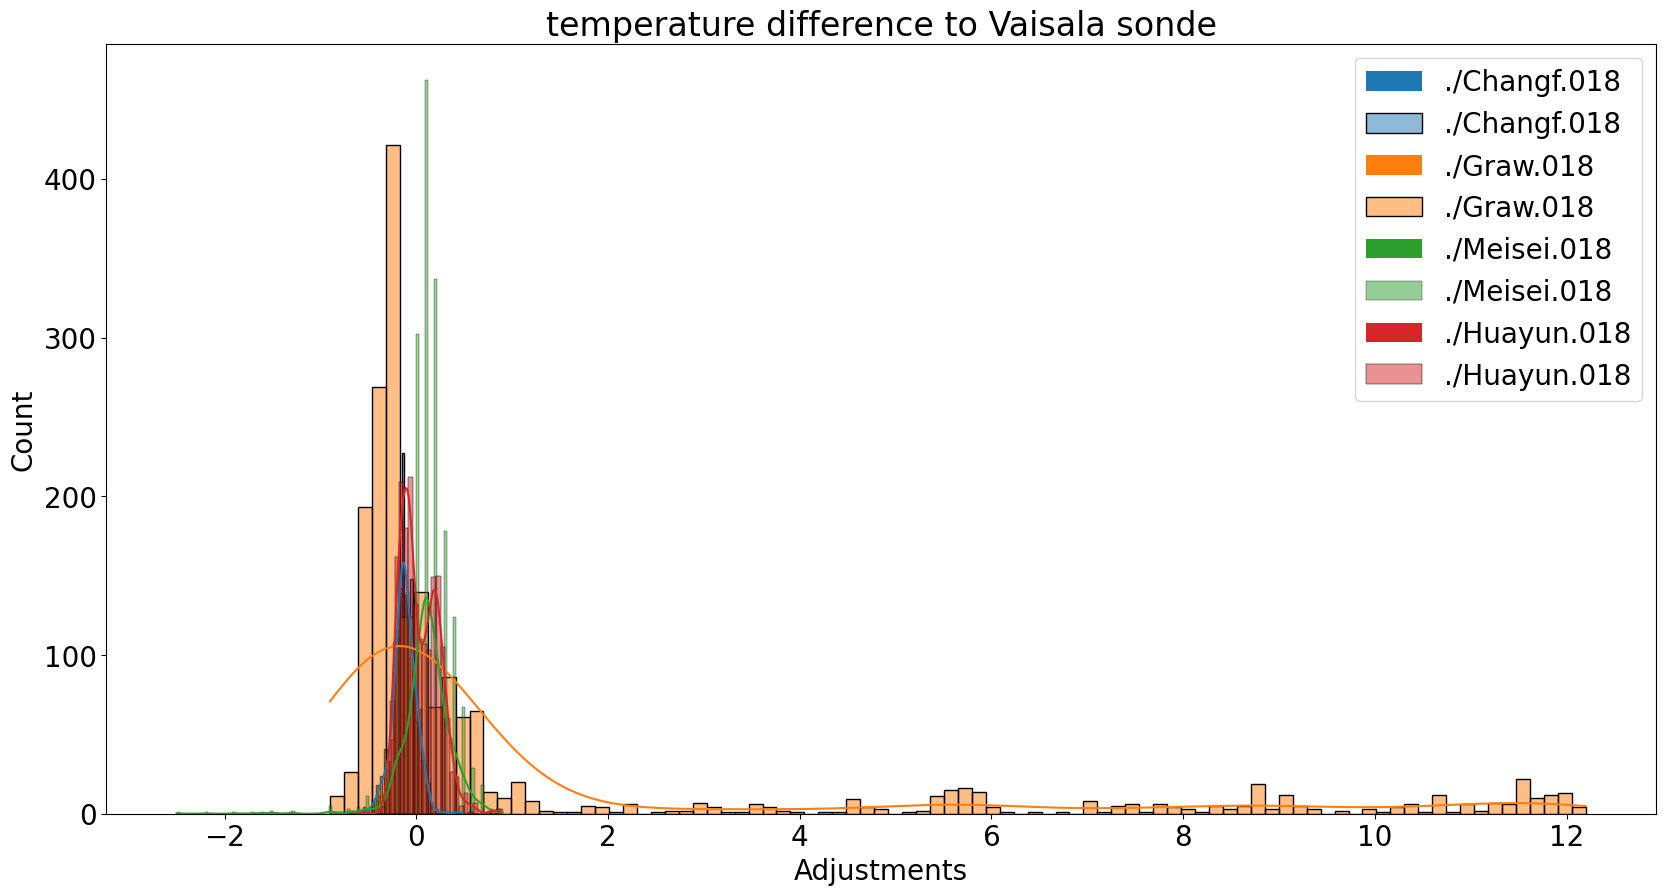

./Changf.021
./Graw.021
./Vaisala.021
./Meisei.021
./Huayun.021


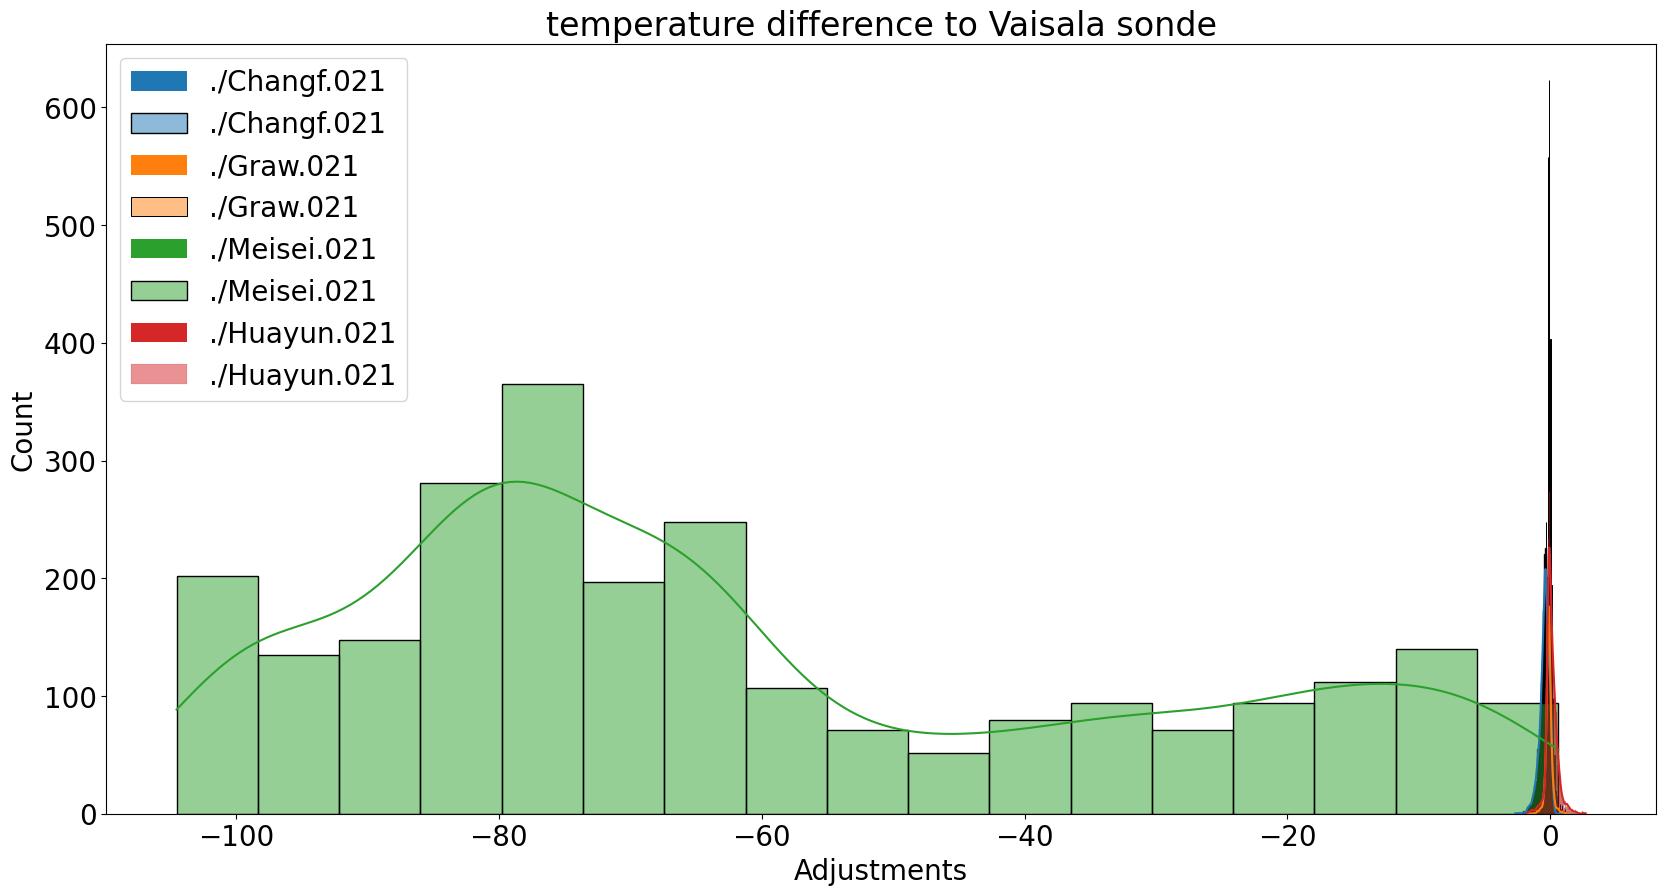

./Changf.023
./Graw.023
./Vaisala.023
./Meisei.023
./Huayun.023


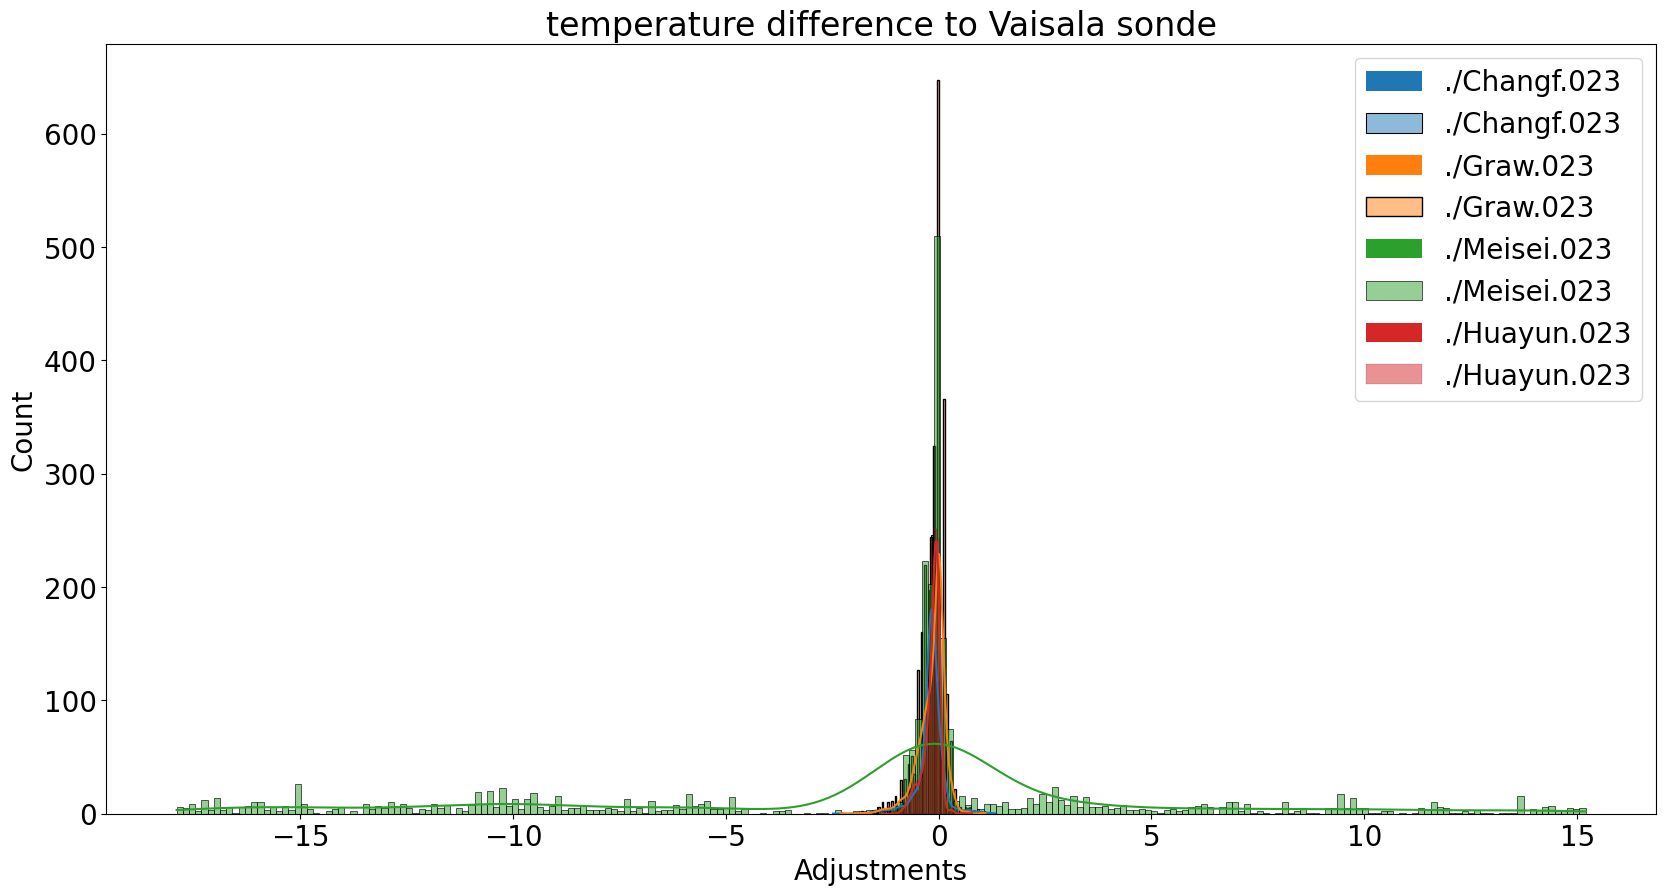

./Jinyang.025
error
./Jinyang.028
error
./Jinyang.030
error
./Jinyang.033
error
./Jinyang.035
error
./Jinyang.037
error
./Jinyang.039
error
./Jinyang.041
error
./Vaisala.044
./Jinyang.044
error
./Jinyang.046
error
./Jinyang.049
error
./Jinyang.051
error
./Changf.054
./Graw.054
./Vaisala.054
./3therm.054
./Meisei.054
./Huayun.054


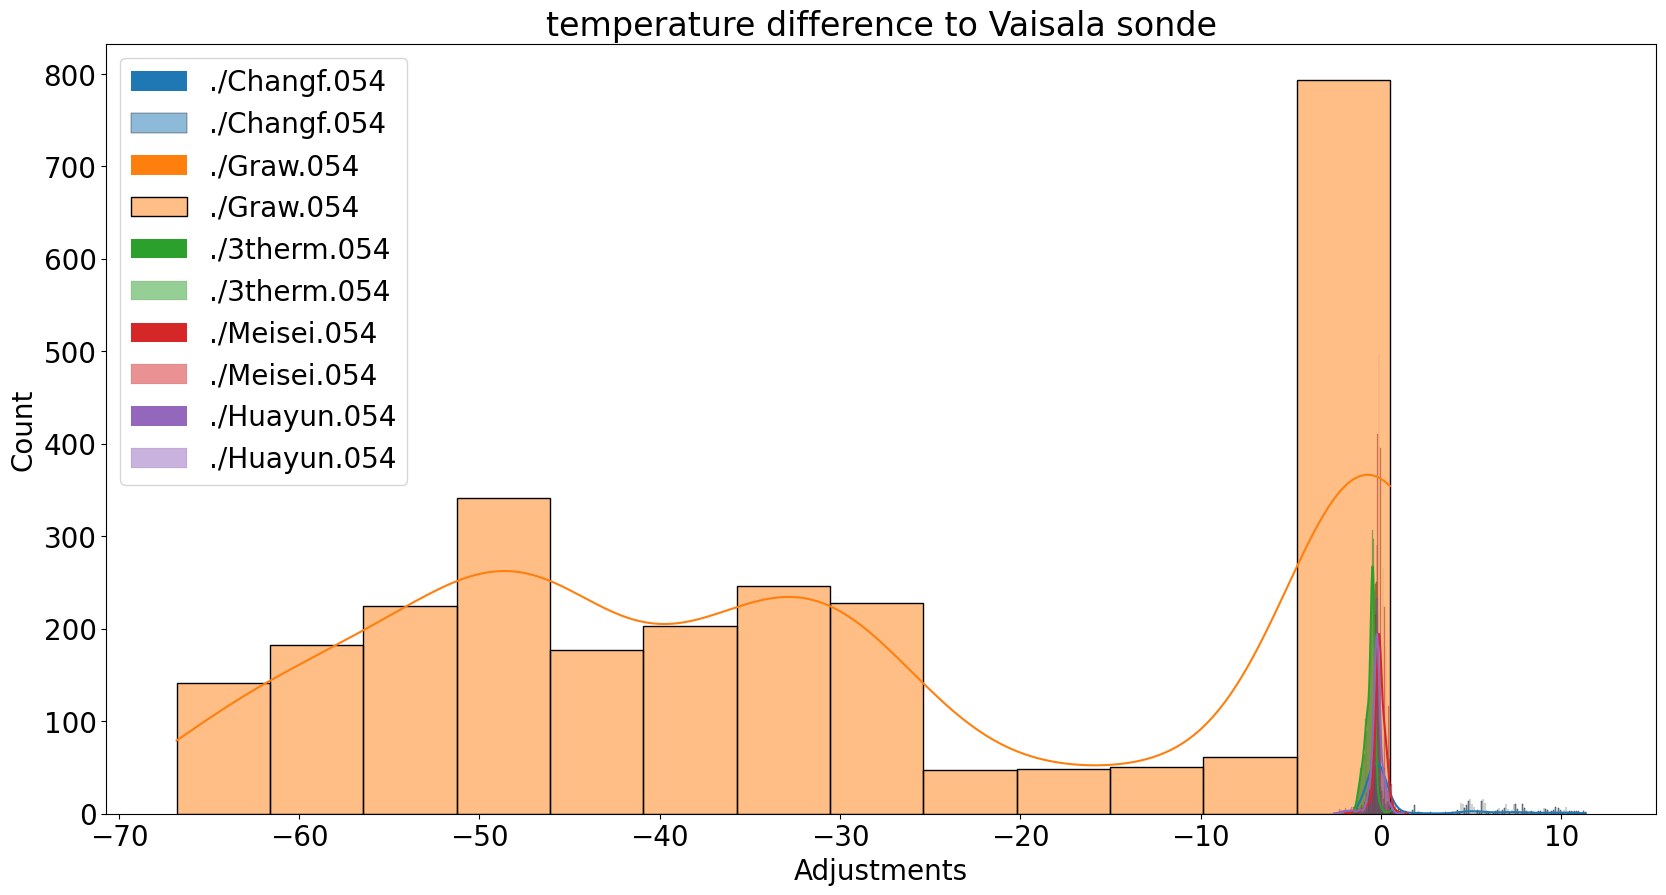

error
./Daqiao.058
./Jinyang.058
error
./Changf.059
./Graw.059
./Vaisala.059
./Meisei.059
./Huayun.059


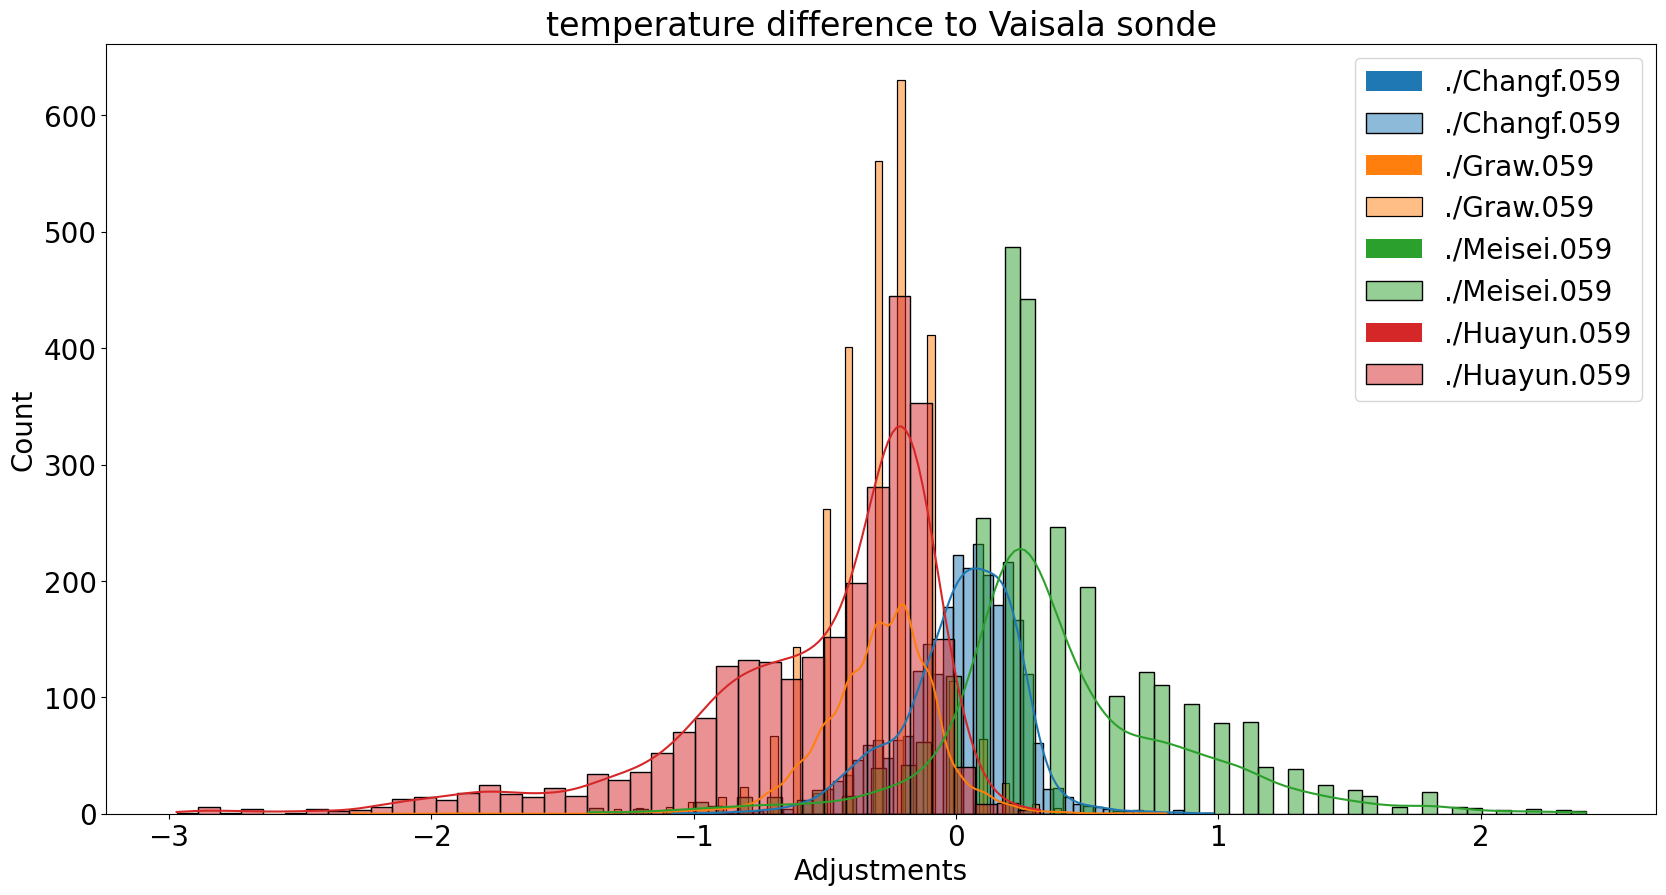

./Changf.062
./Graw.062
./Vaisala.062
./LM.062
./Meisei.062
./Huayun.062


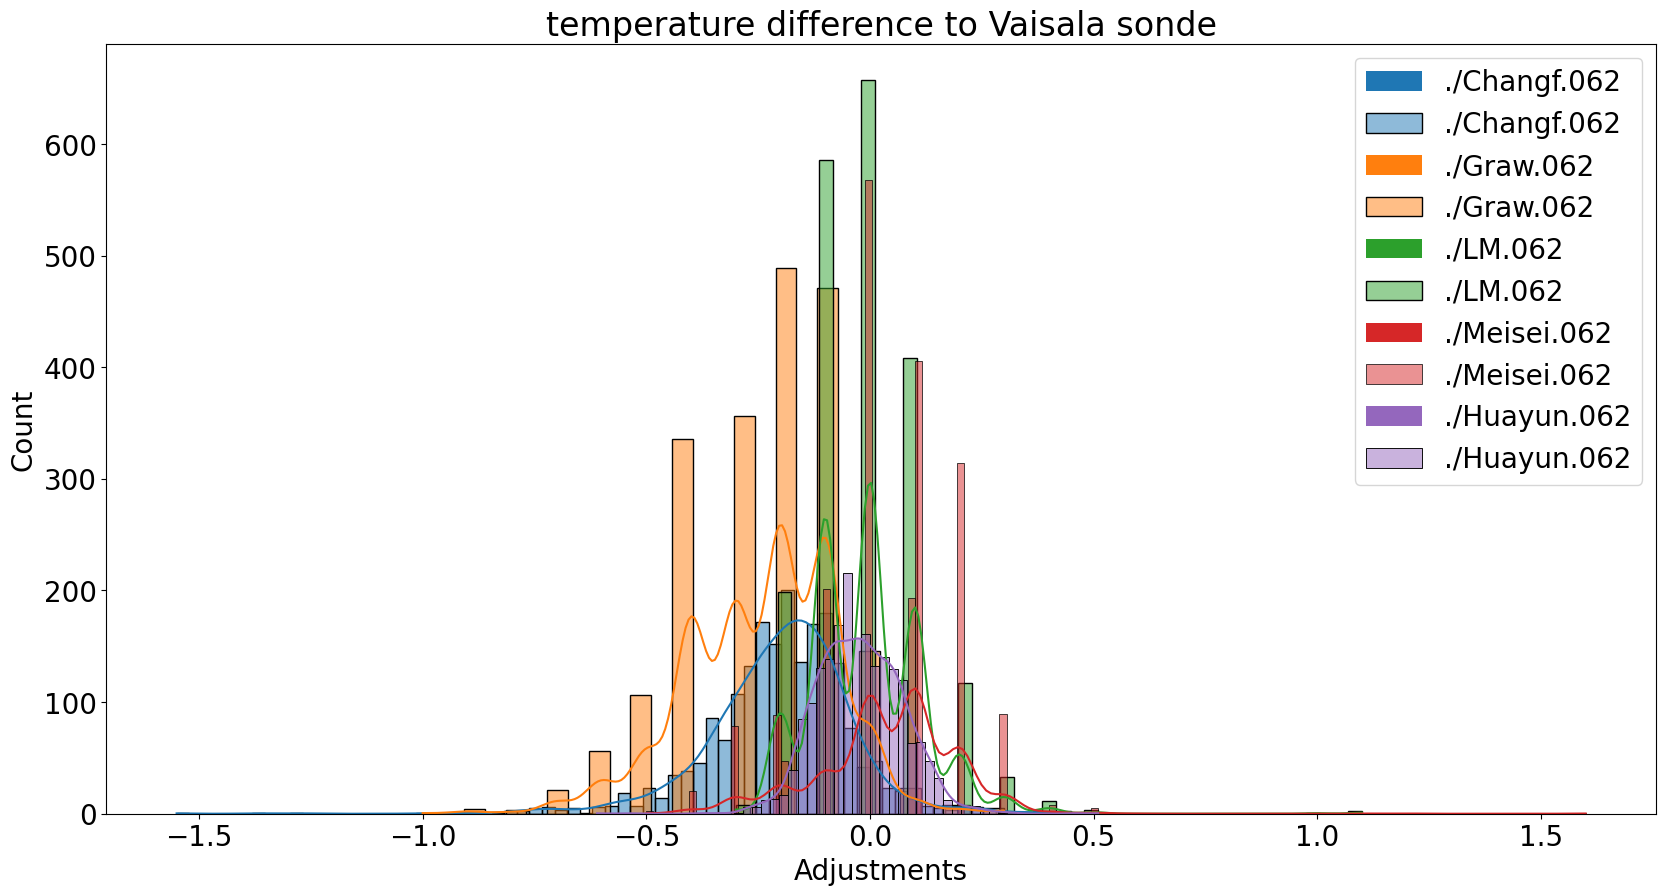

./Jinyang.063
error
./Changf.064
./Graw.064
./Vaisala.064
./3therm.064
./Meisei.064
./Huayun.064


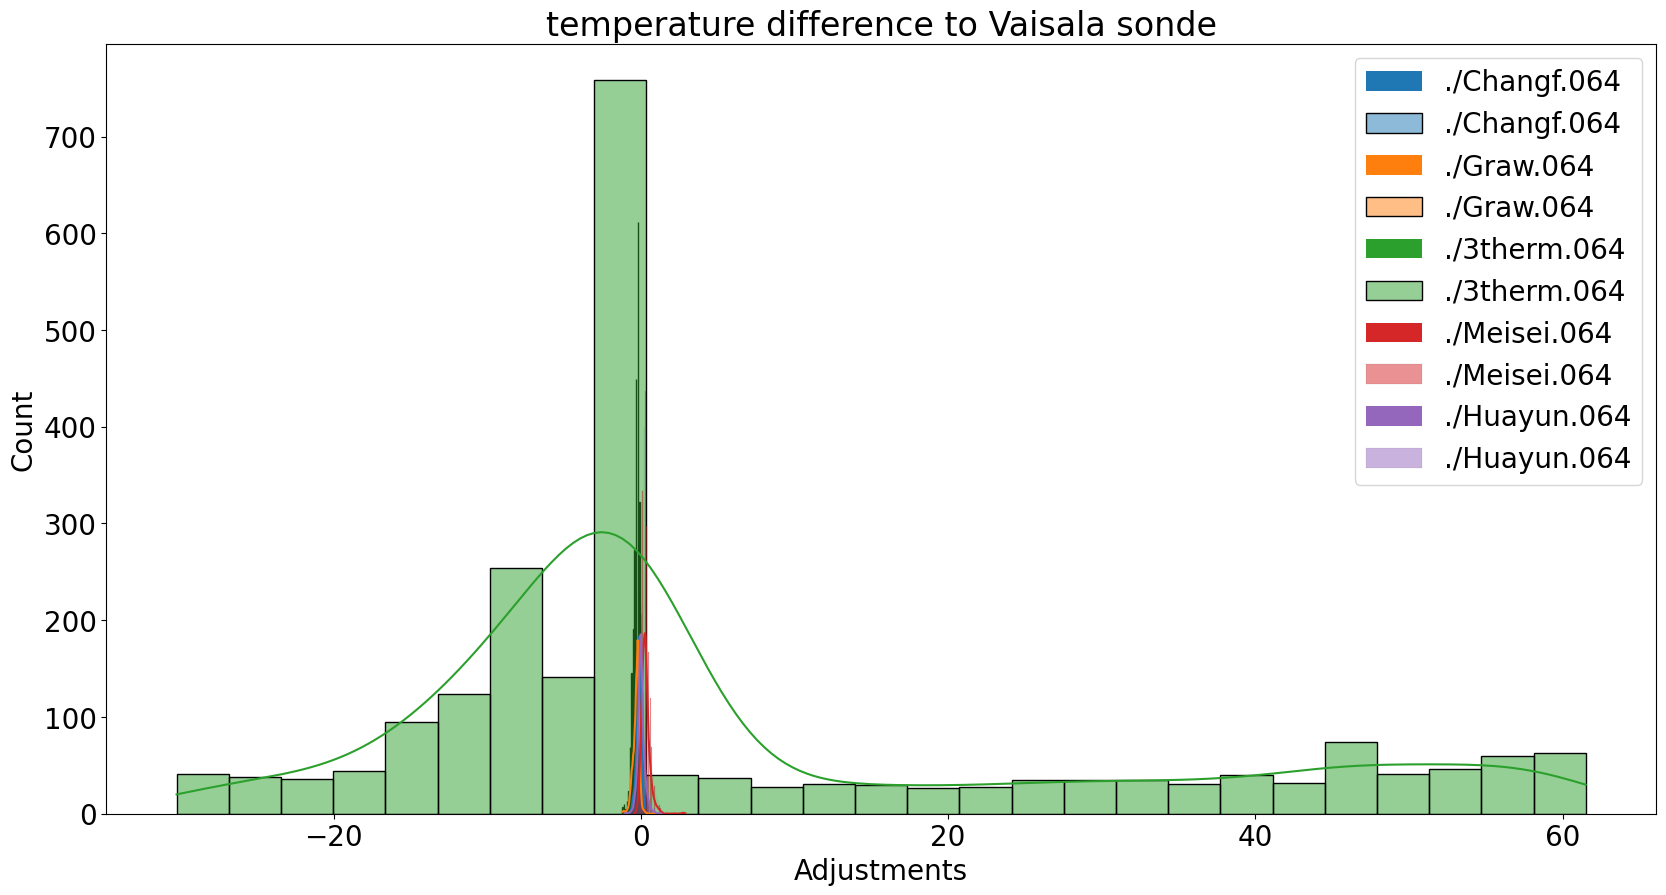

./Daqiao.067
./Jinyang.067
error
./Changf.068
./Graw.068
./Vaisala.068
./LM.068
error
./Changf.069
./Graw.069
./Vaisala.069
./Meisei.069
./Huayun.069
error
./Daqiao.071
./Jinyang.071
error
./Changf.072
./Graw.072
./Vaisala.072
./LM.072
error


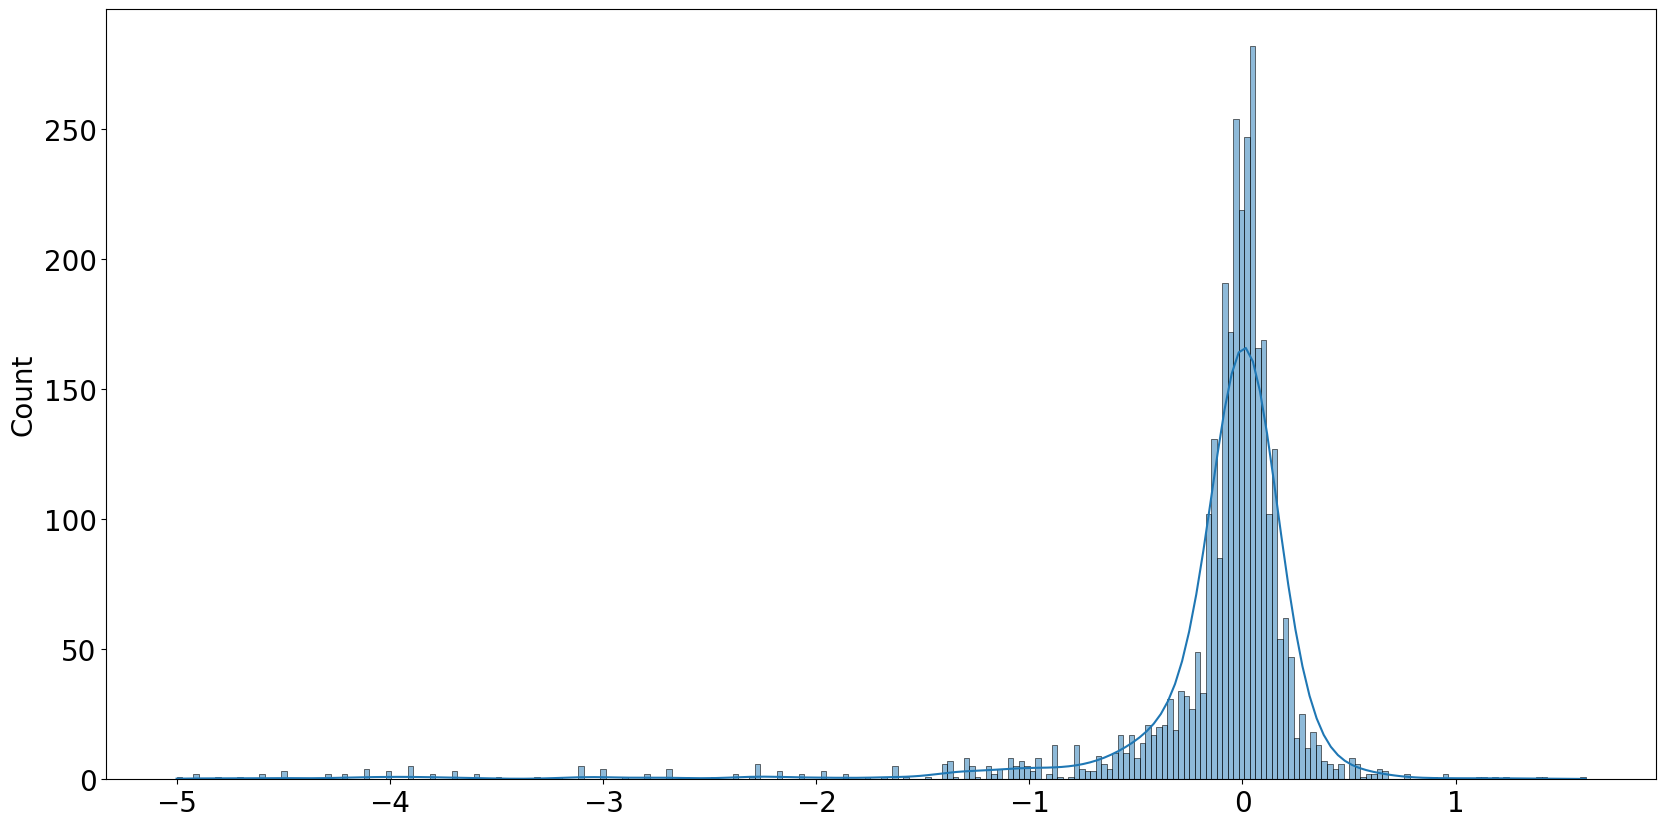

In [43]:
for asc in np.sort(glob.glob('/users/staff/uvoggenberger/CEUAS/CEUAS/public/intercomparisons/DATA/Vaisala/*')):
    try:
        ascentnr = asc[-3:]
        for i in glob.glob('/users/staff/uvoggenberger/CEUAS/CEUAS/public/intercomparisons/DATA/*/*.'+ascentnr):
            text = open(i, "r")

            #join() method combines all contents of 
            # csvfile.csv and formed as a string
            text = ''.join([i for i in text]) 

            # search and replace the contents
            text = text.replace("\t", ",") 
            text = re.sub(" +", ",", text)
            # output.csv is the output file opened in write mode
            x = open('./'+i.split('/')[-1],"w")

            # all the replaced text is written in the output.csv file
            x.writelines(text)
            x.close()

        yang_dfs = []
        for i in glob.glob('./*.'+ascentnr):
            df = pd.read_csv(i, delimiter=',', header=0)
            print(i)
            yang_dfs.append(df)

        labels = glob.glob('./*.'+ascentnr)
        compare_to = labels.index([s for s in labels if "Vaisala" in s][0])

        yang_dfs[compare_to].Pressure = pd.to_numeric(yang_dfs[compare_to].Pressure, errors='coerce')
        yang_dfs[compare_to] = yang_dfs[compare_to].dropna(subset = ['Pressure'])
        yang_dfs[compare_to].Temperature = pd.to_numeric(yang_dfs[compare_to].Temperature, errors='coerce')
        yang_dfs[compare_to] = yang_dfs[compare_to].dropna(subset = ['Temperature'])

        for sonde in range(len(labels)):
            if sonde == compare_to:
                continue
            delta_t = []
            yang_dfs[sonde].Pressure = pd.to_numeric(yang_dfs[sonde].Pressure, errors='coerce')
            yang_dfs[sonde] = yang_dfs[sonde].dropna(subset = ['Pressure'])
            yang_dfs[sonde].Temperature = pd.to_numeric(yang_dfs[sonde].Temperature, errors='coerce')
            yang_dfs[sonde] = yang_dfs[sonde].dropna(subset = ['Temperature'])
            for press in range(len(yang_dfs[compare_to])):
                delta_t.append(
                    yang_dfs[compare_to].Temperature.iloc[press]
                    - yang_dfs[sonde][
                        yang_dfs[sonde].Pressure
                        == find_nearest(
                            np.array(yang_dfs[sonde].Pressure),
                            yang_dfs[compare_to].Pressure.iloc[press]
                        )
                    ].Temperature.values[0]
                )
            ax = seaborn.histplot(delta_t, label=labels[sonde], kde=True)
        ax.set(xlabel="Adjustments")
        ax.set(title='temperature difference to Vaisala sonde')
        plt.legend()
        plt.show()
    except:
        print('error')